In [1]:
import sys
sys.path.append('../..')
from fourier_scaffold import FourierScaffold, ScaffoldHippocampalLayer
import torch

/home/ezrahuang/Projects/rl-research/vectorhash/experiments/hipp_grid_fourier/../../vectorhash_functions.py:1: UserWarning: A NumPy version >=1.23.5 and <2.5.0 is required for this version of SciPy (detected version 1.23.0)
  import scipy.special


In [14]:
D = 1000
N_h = 400
shapes = torch.tensor([(3, 3), (5, 5)])
scaffold = FourierScaffold(shapes=shapes, D=D, _skip_K_calc=True)
layer = ScaffoldHippocampalLayer(D=D, N_h=N_h, theta=-1, scaffold=scaffold)

module shapes:  tensor([[3, 3],
        [5, 5]])
N_g (D) :  1000
M       :  2
d       :  2
N_patts :  225


In [15]:
gbook = scaffold.gbook().T

In [16]:
layer.hippocampal_from_grid(gbook)

tensor([[16.7219, 17.2039, 16.3790,  ..., 16.6594, 16.9550, 16.4113],
        [ 1.0247,  1.3036,  1.1414,  ...,  0.5062,  1.0521,  1.5789],
        [ 1.6627,  1.4852,  1.7405,  ...,  1.3920,  1.5326,  1.6732],
        ...,
        [ 1.1401,  1.6792,  1.4814,  ...,  1.5692,  1.7209,  1.4659],
        [ 0.4244,  1.1557,  0.7956,  ...,  1.2218,  0.7471,  0.9243],
        [ 1.9392,  1.7854,  1.6651,  ...,  2.0694,  1.3843,  1.9097]])

In [17]:
layer.grid_from_hippocampal(layer.hippocampal_from_grid(gbook))

tensor([[27.4612+7.8766j,  5.7701-15.2100j, 15.5351+17.5494j,  ...,
          9.5643-3.3583j,  7.8032-10.1918j,  1.8826+16.2682j],
        [ 2.0283+0.5994j,  0.4786-1.1531j,  0.9987+1.2838j,  ...,
          0.6737-0.3335j,  0.5402-0.6801j,  0.1048+1.1323j],
        [ 2.6917+0.8674j,  0.5746-1.4694j,  1.6005+1.6981j,  ...,
          0.9254-0.3229j,  0.6979-0.9391j,  0.1362+1.5921j],
        ...,
        [ 2.2113+0.6848j,  0.4773-1.2675j,  1.2870+1.3939j,  ...,
          0.7915-0.2983j,  0.5970-0.8368j,  0.1086+1.2845j],
        [ 1.4952+0.5142j,  0.3690-0.8264j,  0.8405+1.0675j,  ...,
          0.5182-0.2357j,  0.4500-0.6067j,  0.1365+0.8379j],
        [ 2.8758+0.7717j,  0.6387-1.6421j,  1.6902+1.8697j,  ...,
          1.0991-0.3803j,  0.8781-1.1234j,  0.2262+1.7517j]])

In [18]:
g = gbook[0]
g_ = layer.grid_from_hippocampal(layer.hippocampal_from_grid(g))

def similarity(g, g_):
  return (g * g_).sum().abs() / (g.norm() + g_.norm())

print(similarity(g, g_))



tensor(0.1037)


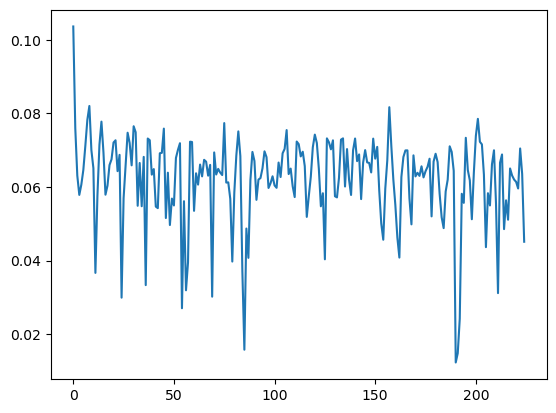

In [19]:
similarities = [similarity(g, layer.grid_from_hippocampal(layer.hippocampal_from_grid(g))) for g in gbook]
import matplotlib.pyplot as plt

plt.plot(torch.arange(len(gbook)), similarities)

In [13]:
layer.hippocampal_from_grid(gbook).norm(dim=1)

tensor([3.1656e+02, 5.6065e+00, 6.1466e+00, 4.8295e+00, 2.5387e+00, 9.5168e+00,
        9.7106e-01, 1.1074e+00, 1.1363e+01, 3.2612e+00, 3.7371e+00, 2.0967e+00,
        1.7949e+01, 4.4082e+00, 3.7531e+00, 7.9526e+00, 4.2511e+00, 1.0949e+01,
        4.9340e-01, 4.7840e+00, 1.2981e+01, 6.8871e+00, 3.2251e+00, 1.0793e+01,
        2.8893e+00, 3.2111e+00, 7.5855e+00, 8.3371e+00, 6.7282e+00, 5.2259e+00,
        1.0868e+01, 3.0535e+00, 1.3867e+00, 7.6410e-02, 4.9949e+00, 1.1541e+01,
        6.6135e+00, 4.0470e+00, 1.3264e+01, 3.5475e+00, 0.0000e+00, 1.4122e+01,
        6.2579e+00, 1.4082e+00, 4.5186e+00, 7.1234e+00, 6.9684e+00, 2.1457e+01,
        5.6988e+00, 2.6107e+00, 2.0260e+01, 9.8436e+00, 4.8887e+00, 8.6597e+00,
        1.2588e+00, 2.1341e+00, 1.0460e+01, 2.3535e+00, 8.3296e+00, 3.4527e+00,
        1.5081e+01, 1.5749e+00, 3.4622e-02, 0.0000e+00, 1.3242e+00, 0.0000e+00,
        2.4314e+01, 1.0640e+01, 8.6328e+00, 2.2026e+00, 3.7908e+00, 2.6402e-01,
        1.9121e+01, 3.6137e+00, 1.4108e+